In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')




In [3]:
df=pd.read_csv('../artifacts/raw/data.csv')
pd.set_option('display.max_columns',100)
df.head()

,MyUnknownColumn,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## data exploration, cleaning ,handing


In [4]:
df.shape

(103594, 25)

In [5]:
for i in  df.columns:
    print(i)

MyUnknownColumn
id
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


### Use Columns
Gender <br>
Customer Type<br>
Age<br>
Type of Travel<br>
Class<br>
Flight Distance<br>
Inflight wifi service<br>
Departure/Arrival time convenient<br>
Ease of Online booking<br>
Gate location<br>
Food and drink<br>
Online boarding<br>
Seat comfort<br>
Inflight entertainment<br>
On-board service<br>
Leg room service<br>
Baggage handling<br>
Checkin service<br>
Inflight service<br>
Cleanliness<br>
Departure Delay in Minutes<br>
Arrival Delay in Minutes<br>
satisfaction<br>

In [6]:
df=df.drop(['MyUnknownColumn','id'],axis=1)

In [7]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

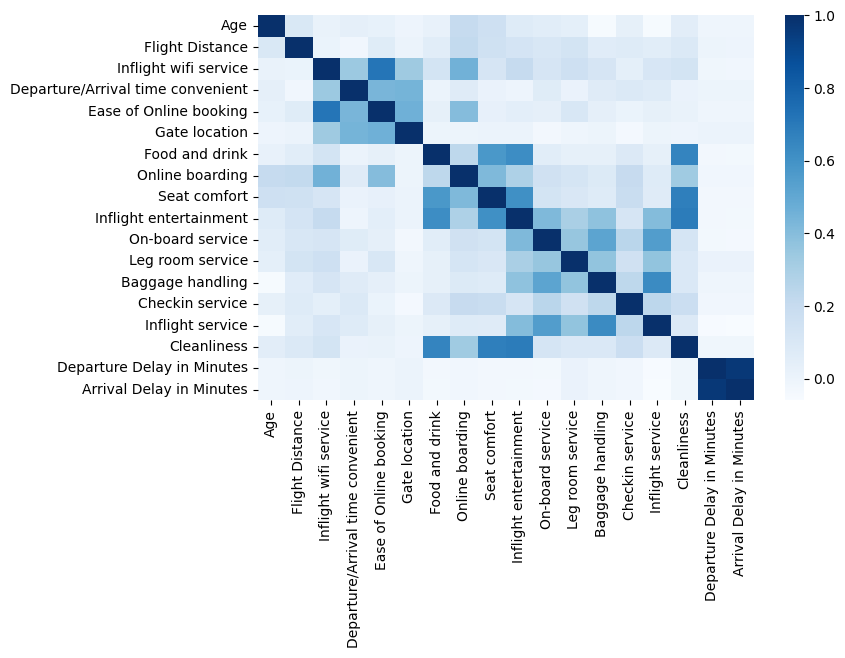

In [10]:
numeric_df=df.select_dtypes(include='number')

corr=numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap="Blues")
plt.show()

No negative correlation between numerical columns <br>
Departure Delay in Minutes and Arrival Delay in Minutes  are highly correlated <br>
 


In [11]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


##### insights
Arrival delay column : <br>
   the minimum arrival delay is 0 (indication no deley) <br>
   the maximum arrival delay is 1584 <br>

flight Distance columns: <br>
   The shortest fight distance in the dataset is 31 (suspicious) <br>
   The longest flight distance is 4983  <br>

Departure Delay column: <br>
  The minimum departure delay is 0 <br>
  The maximum departure delay is 1592 <br>

Note: <br>
The appers to be outliers in the Data as there is a singificant differnce between the third quartile (Q3) and the maximum value


 



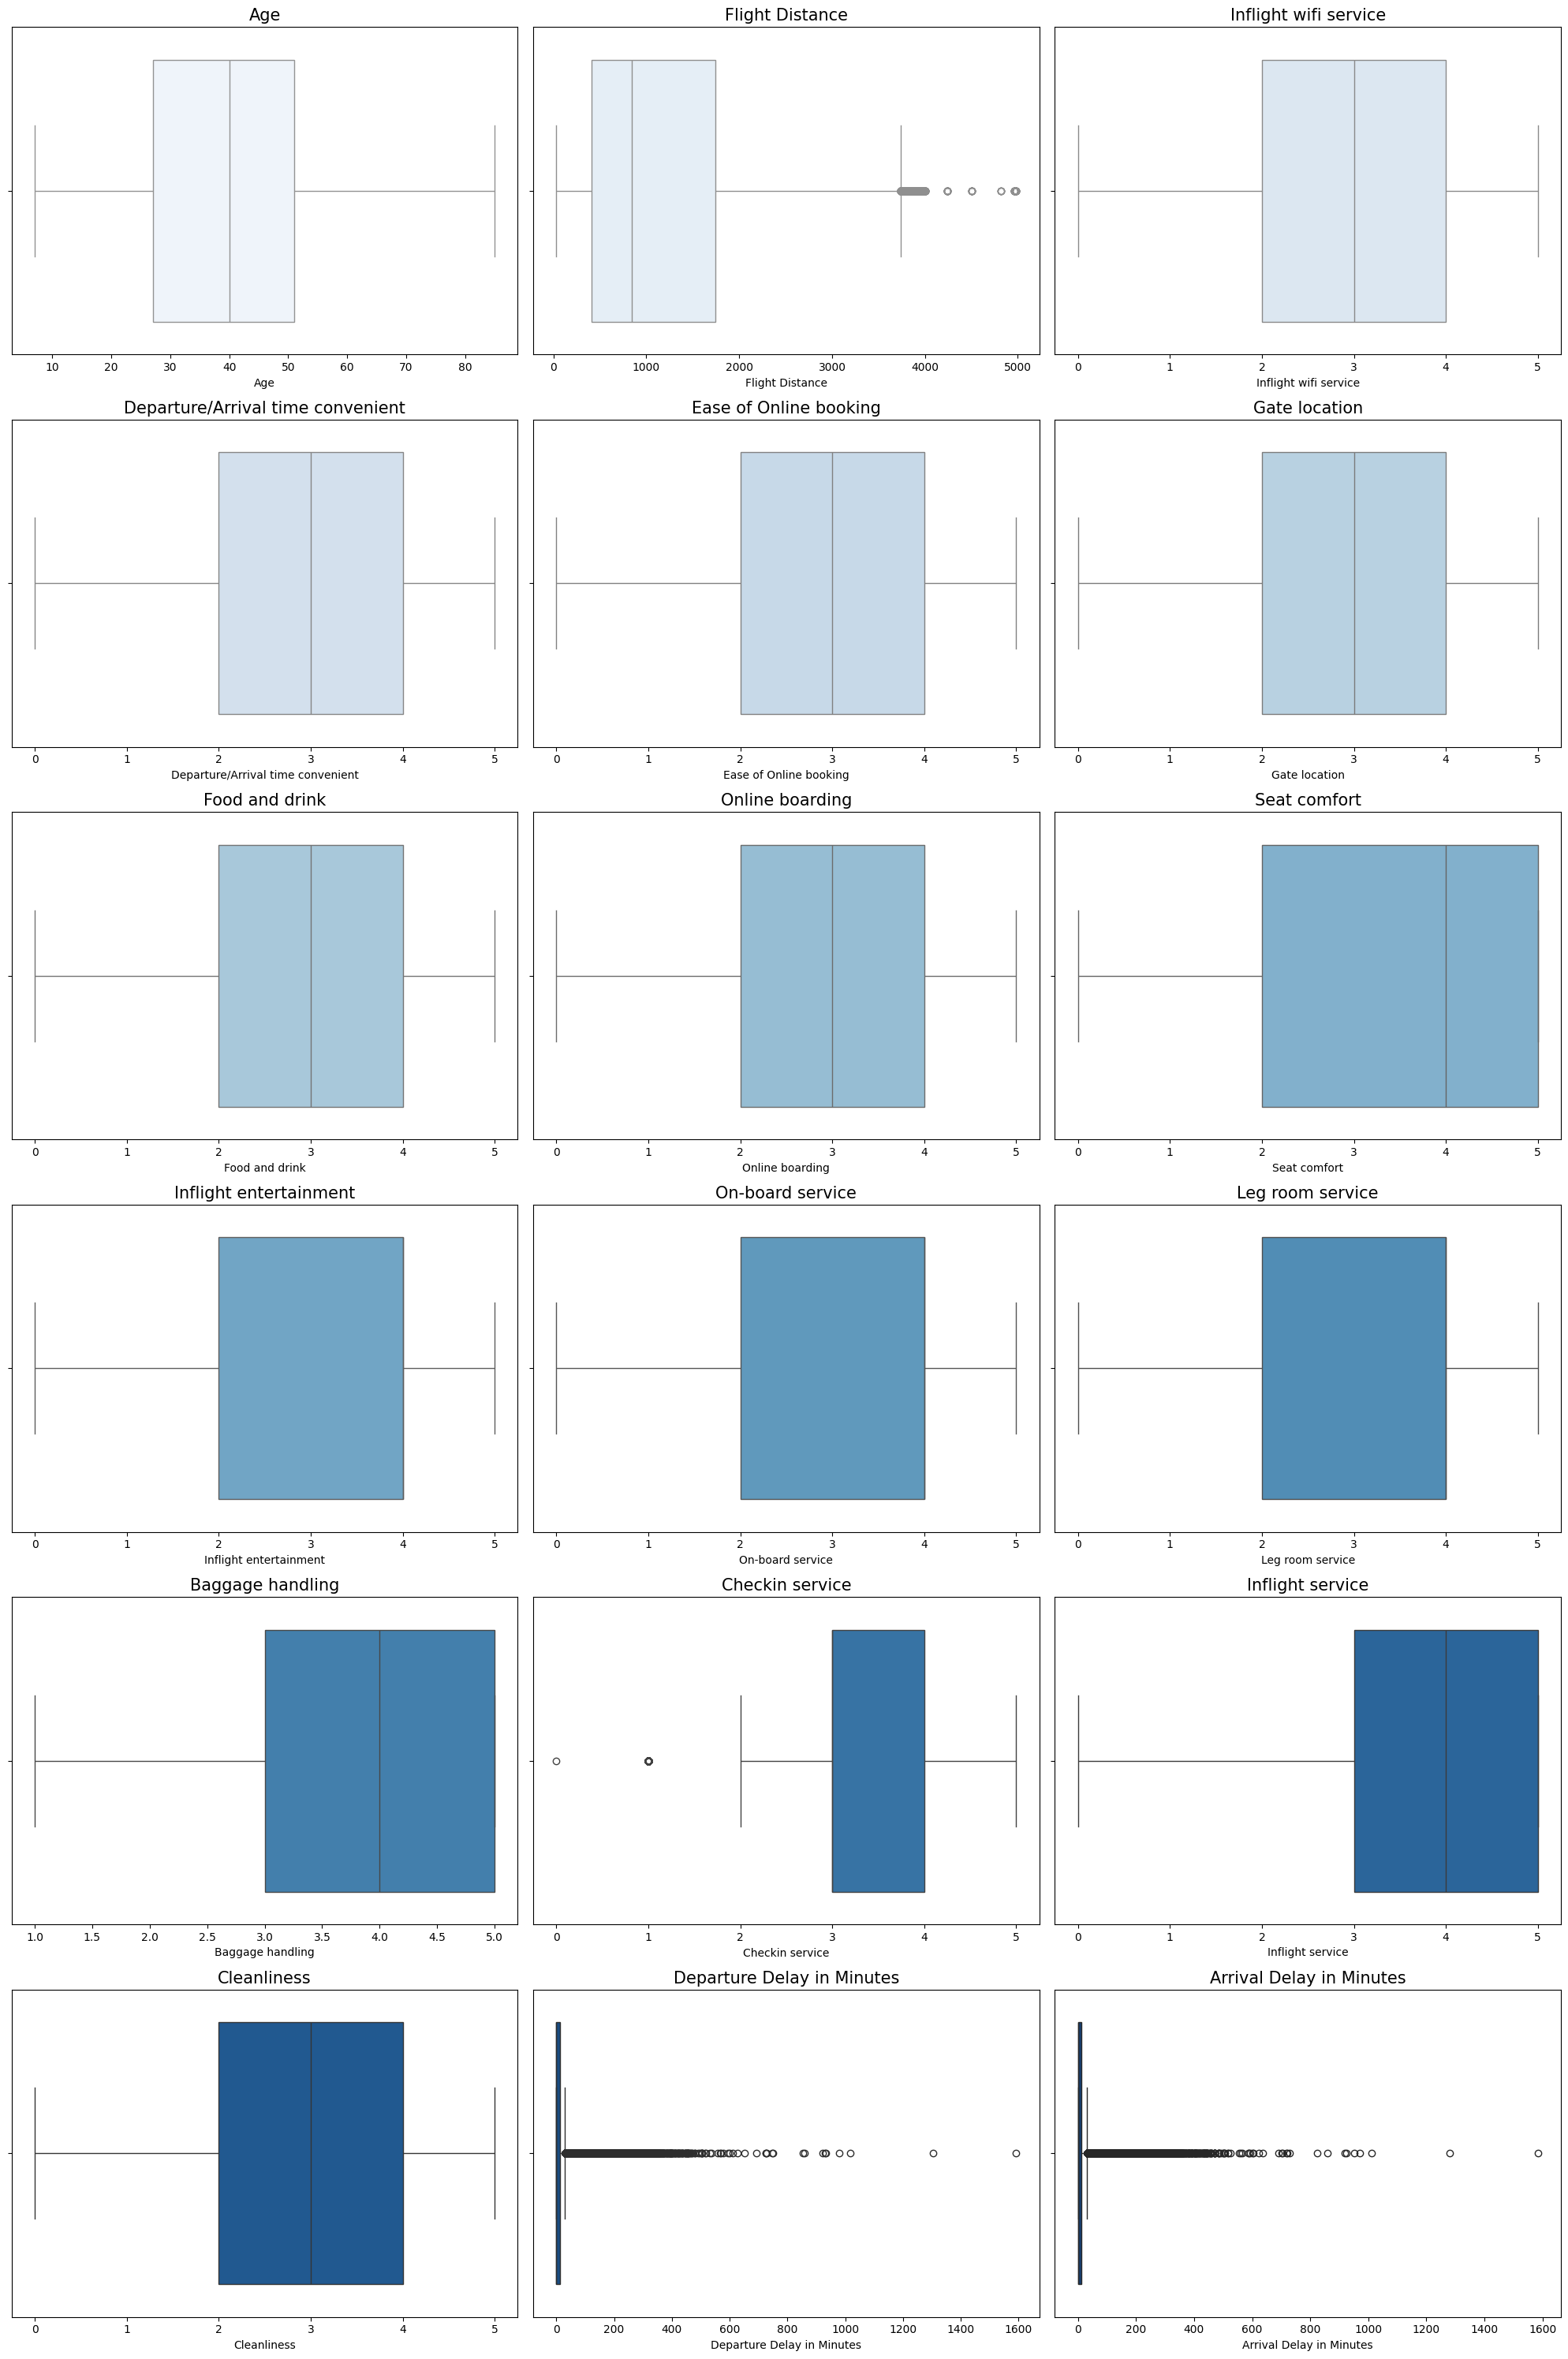

In [12]:
numerical = df.select_dtypes(include=['int', 'float'])

blue_palette = sns.color_palette('Blues', n_colors=len(numerical.columns))

# Adjust the number of rows and columns dynamically based on the number of numerical columns
n_cols = 3  # Fixed number of columns
n_rows = (len(numerical.columns) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjusting figure size
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=15)

# Hide unused subplots if there are more axes than columns
for j in range(len(numerical.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [13]:
## we know these columns have outlier

# 1. Departure depay (too much)
# 2. Arrival Delay (too much)
# 3. check-in service ( very less)
# 4. Flight distance (moderate)

In [14]:
#outlier hander

def handle_outlier(df,columns):
    for column in columns:
        Q1 =df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3 - Q1
        lower_bound=Q1 -1.5 *IQR
        upper_bound =Q3 +1.5*IQR
        df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)
        
        
    return df



columns_to_handel=['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service']    

df=handle_outlier(df,columns_to_handel)

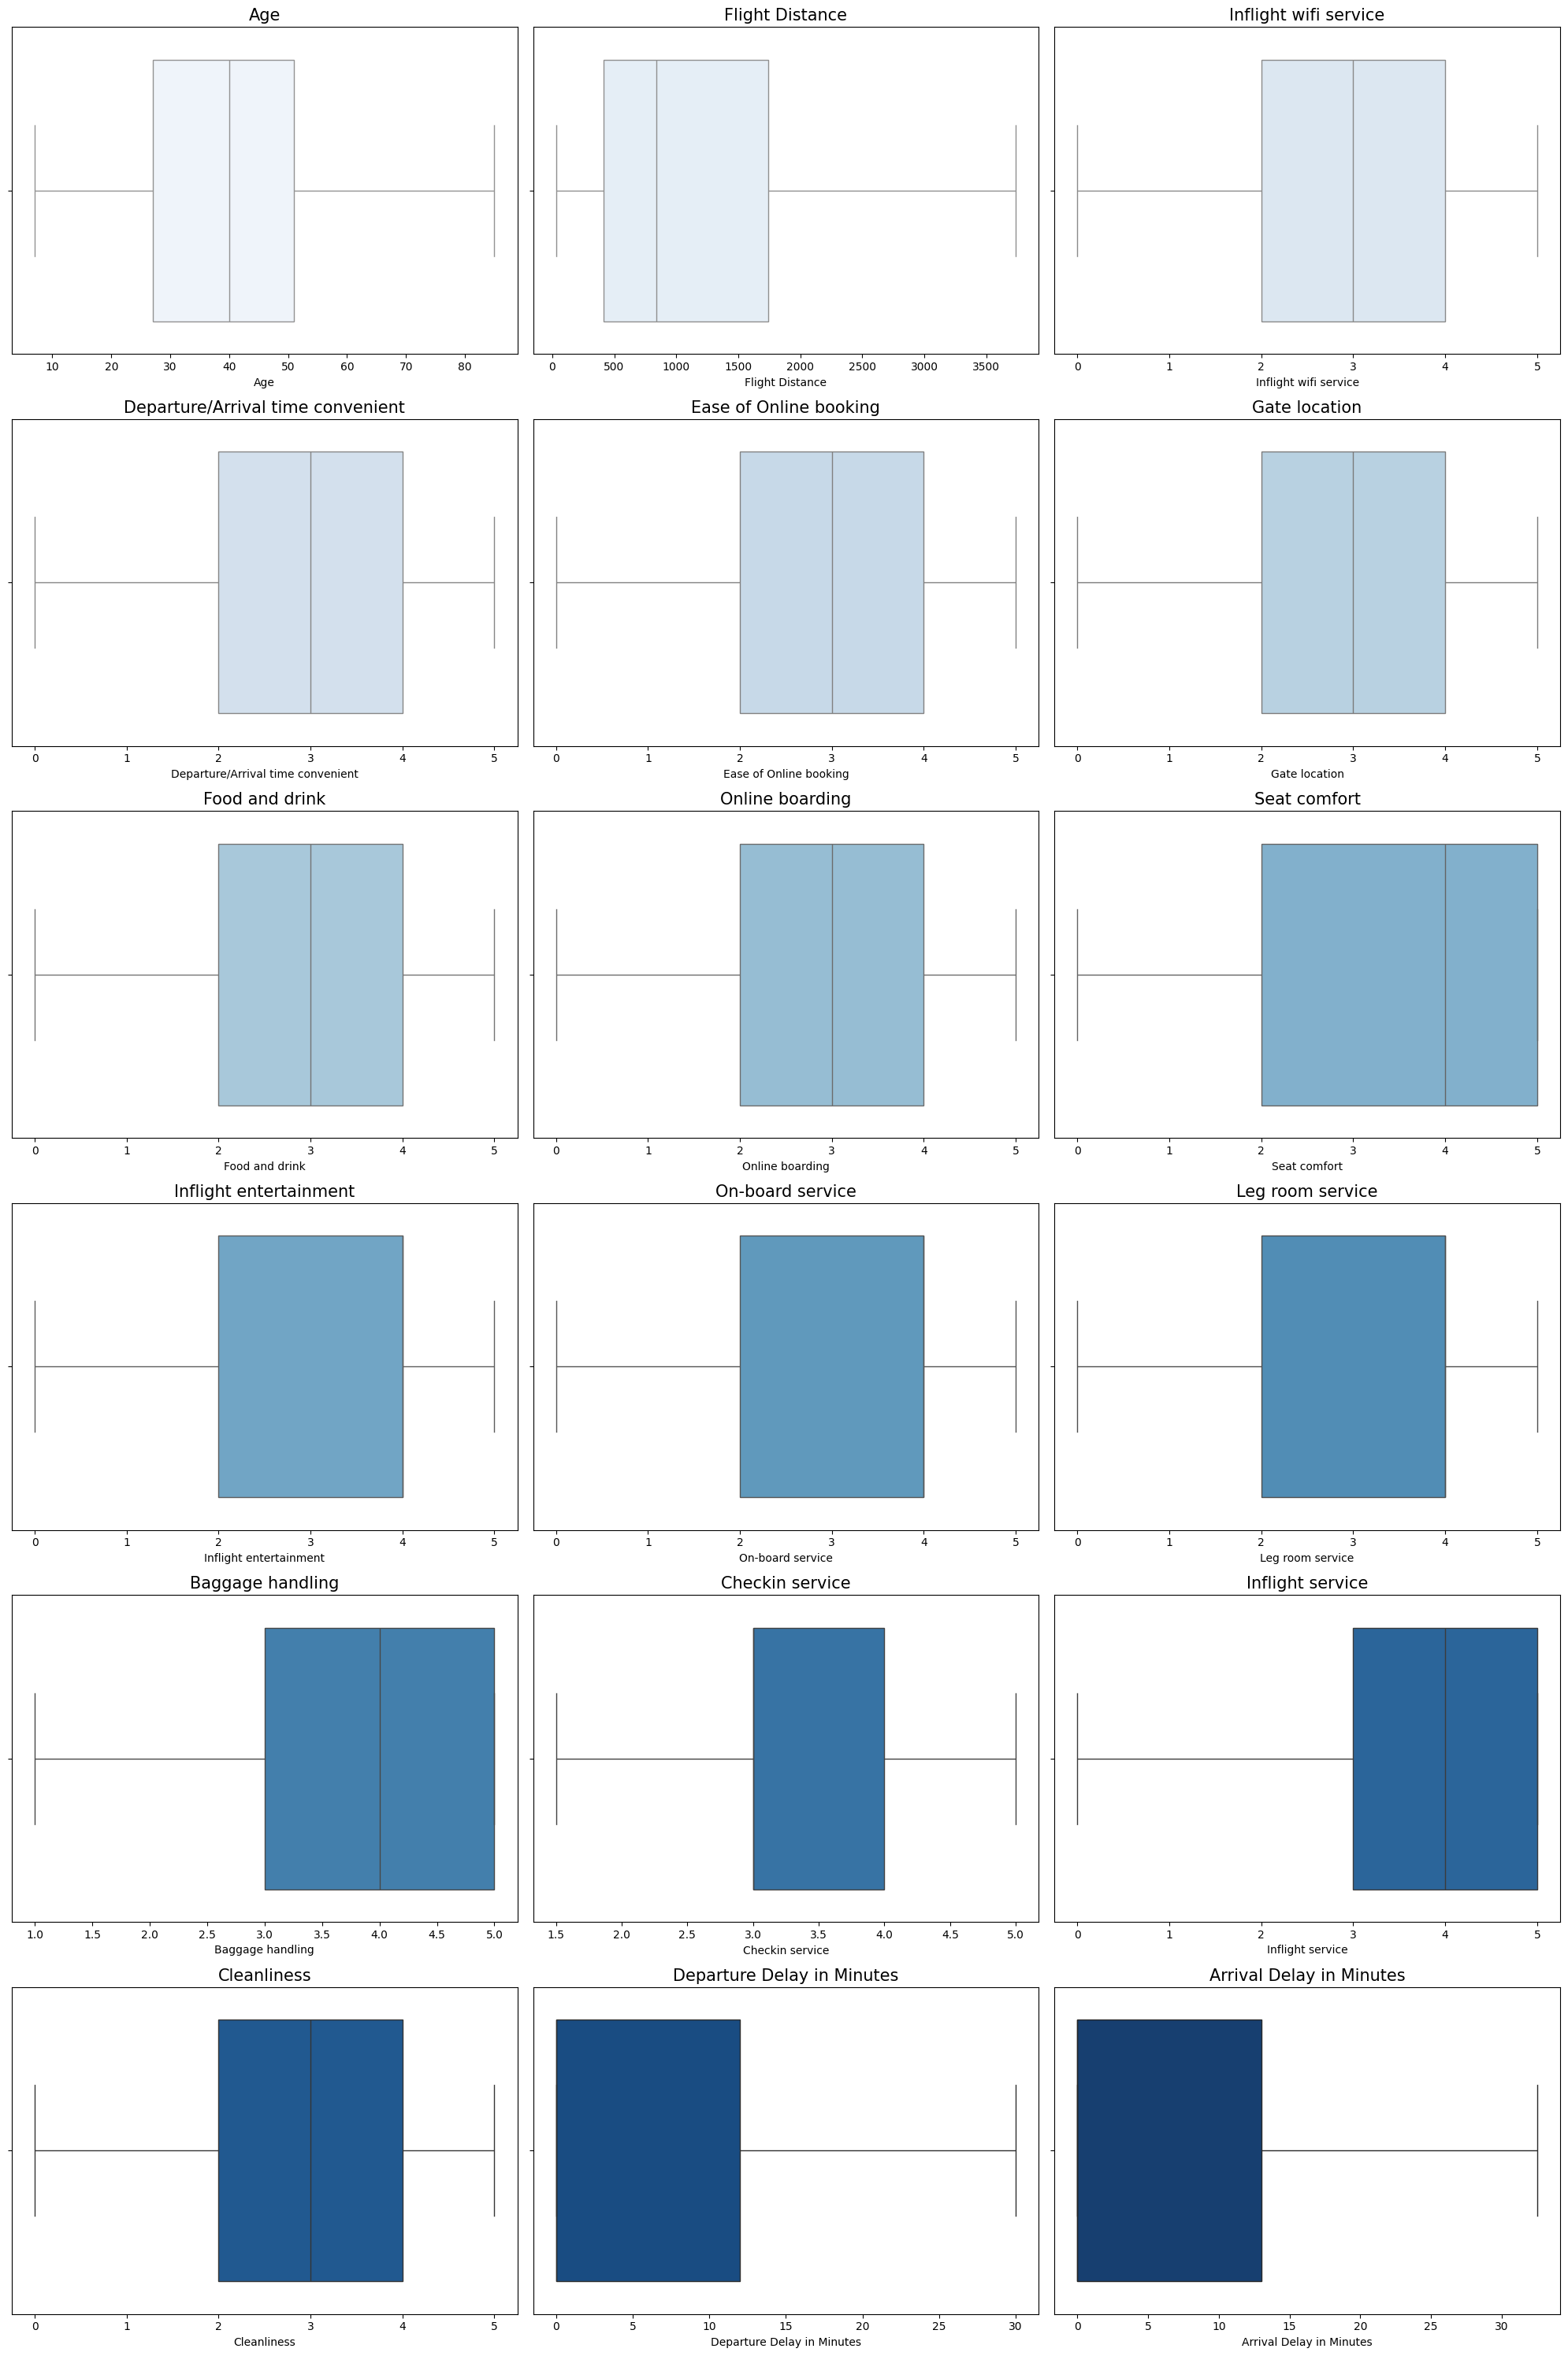

In [15]:
numerical = df.select_dtypes(include=['int', 'float'])

blue_palette = sns.color_palette('Blues', n_colors=len(numerical.columns))

# Adjust the number of rows and columns dynamically based on the number of numerical columns
n_cols = 3  # Fixed number of columns
n_rows = (len(numerical.columns) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjusting figure size
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=15)

# Hide unused subplots if there are more axes than columns
for j in range(len(numerical.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [16]:
df.shape

(103594, 23)

## EDA

In [17]:
new_df =df.copy()

In [18]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
columns_with_six_categories=new_df.columns[new_df.nunique()==6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [20]:
new_df["Cleanliness"].value_counts()

Cleanliness
4    27100
3    24506
5    22619
2    16081
1    13276
0       12
Name: count, dtype: int64

In [21]:
ordinal_mapping ={
    0: "very poor",
    1: "poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"
}

In [22]:
new_df[columns_with_six_categories] =new_df[columns_with_six_categories].applymap(lambda x:ordinal_mapping.get(x,x))

In [23]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [24]:
df["Baggage handling"].value_counts()

Baggage handling
4    37274
5    27047
3    20567
2    11483
1     7223
Name: count, dtype: int64

In [25]:
mapping ={
    1: "very poor",
    2: "poor",
    3: "Average",
    4: "Good",
    5: "Excellent",
   
}
new_df['Baggage handling'] =new_df['Baggage handling'].apply(lambda x:mapping.get(x,x))

In [26]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [27]:
new_df["Checkin service"].value_counts()

Checkin service
4.0    28975
3.0    28356
5.0    20556
2.0    12854
1.5    12853
Name: count, dtype: int64

In [28]:
mapping ={
    1.5: "very poor",
    2.0: "poor",
    3.0: "Average",
    4.0: "Good",
    5.0: "Excellent",
   
}
new_df['Checkin service'] =new_df['Checkin service'].apply(lambda x:mapping.get(x,x))

In [29]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,Good,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


# univariate EDA


In [30]:
numerical_col = new_df.select_dtypes(include=['object', 'category'])


In [31]:
for i in numerical_col:
    print(i)


Gender
Customer Type
Type of Travel
Class
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
satisfaction


In [32]:
numerical_columns=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

categorical_columns=['Gender',
'Customer Type',
'Type of Travel',
'Class',
'Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness'
]

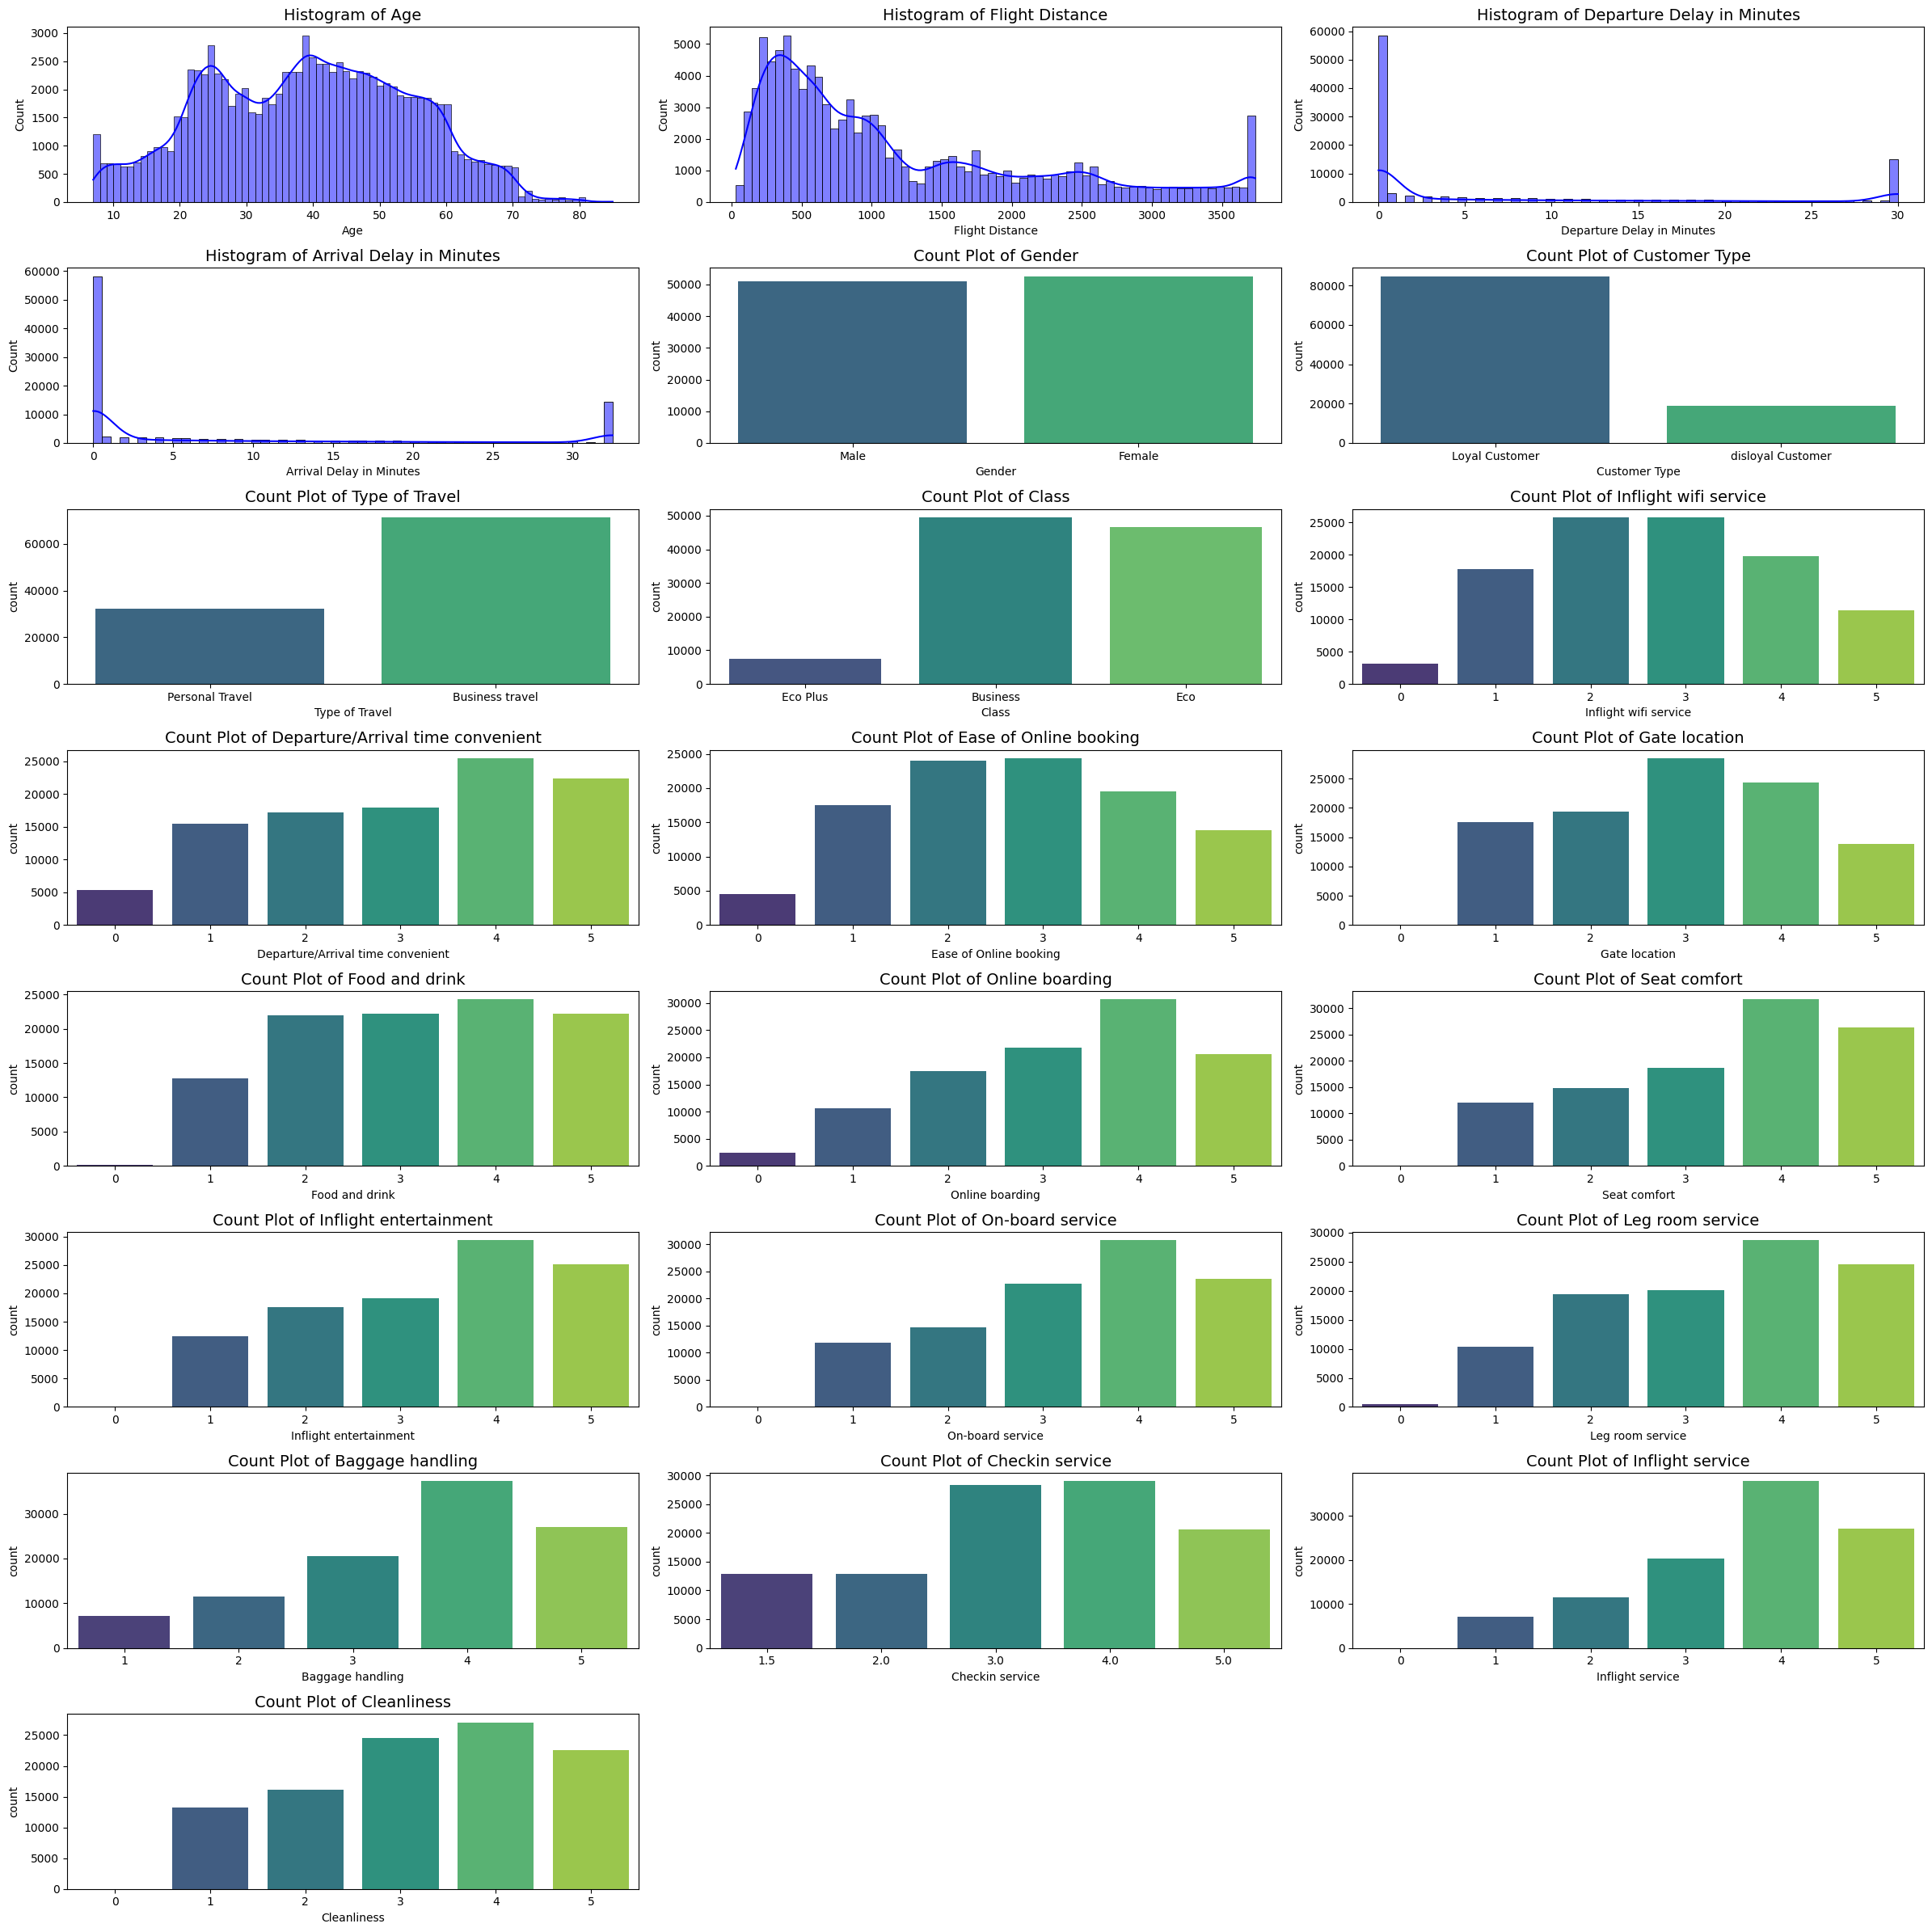

In [33]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(24, 24))
axes = axes.flatten()  # Flatten the axes for easier indexing

# Plot histograms for numerical columns
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)

# Plot count plots for categorical columns
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):  # Ensure we don't exceed the number of axes
        sns.countplot(x=df[col], ax=axes[i + 1 + j], palette='viridis')
        axes[i + 1 + j].set_title(f'Count Plot of {col}', fontsize=14)

# Hide unused axes, if any
for k in range(i + 1 + j + 1, len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

**insights**
- Most customers traveling by flight are between 20 and 60 years of age.
- The flight distance distribution is right-skewed.
- Some flights are delayed by around 30 minutes.
- Females travel more frequently than males.
- Most of the customers are loyal.








#### Bivariate EDA


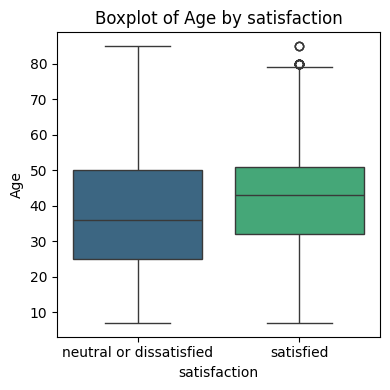

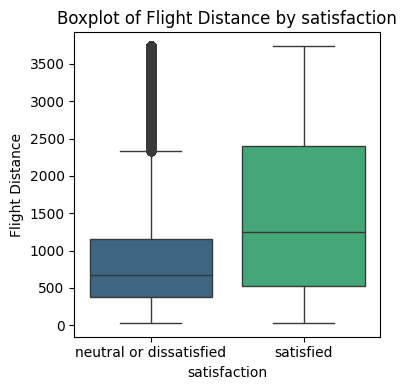

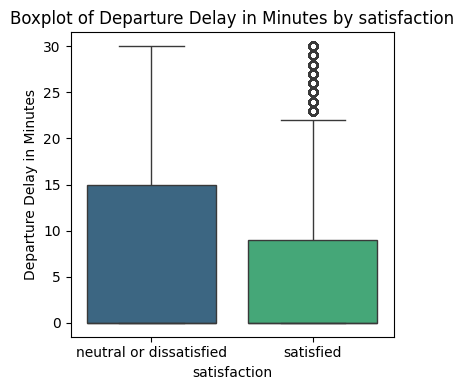

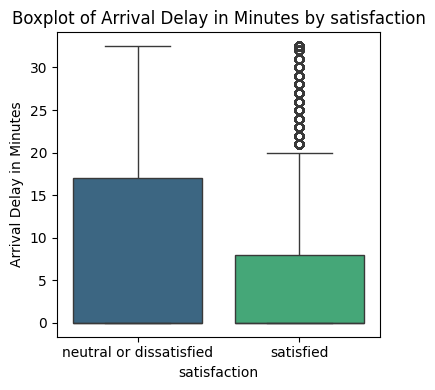

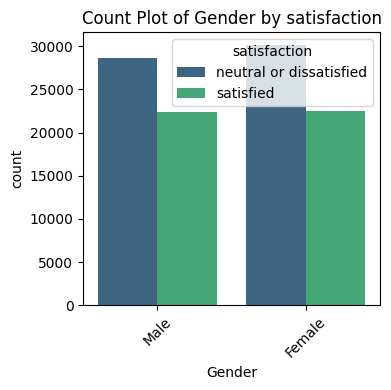

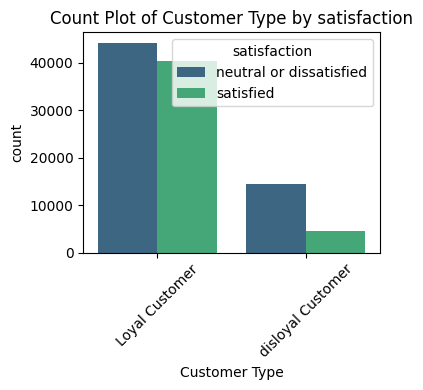

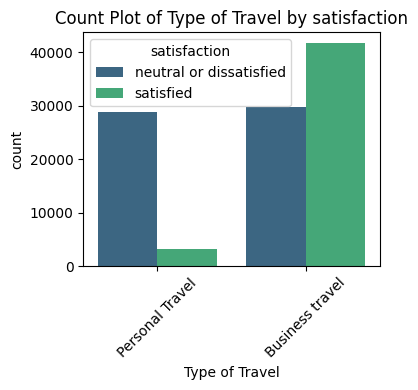

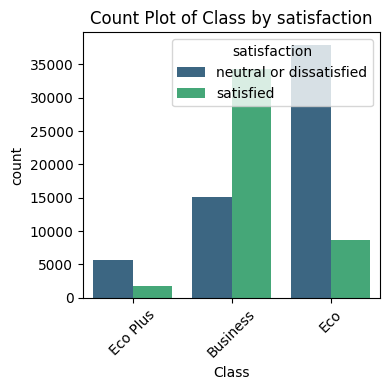

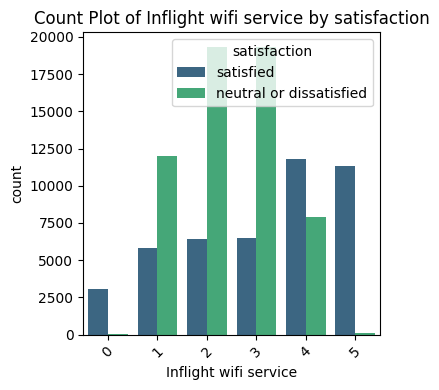

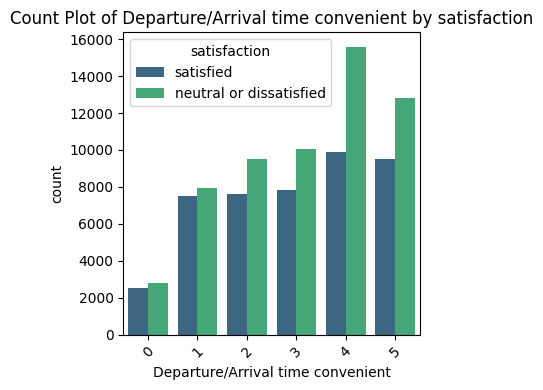

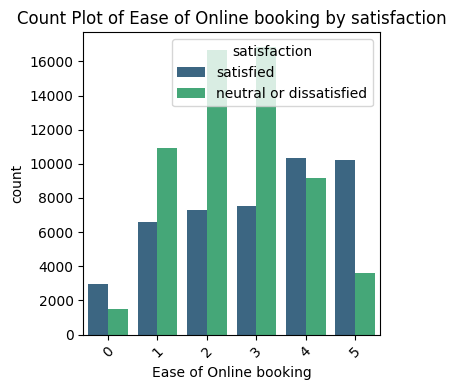

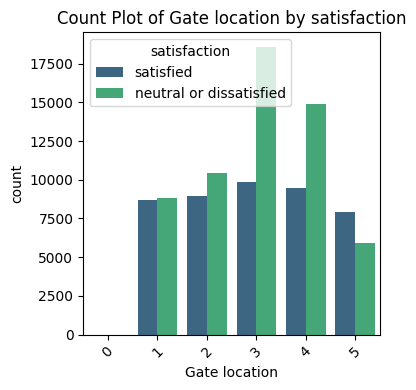

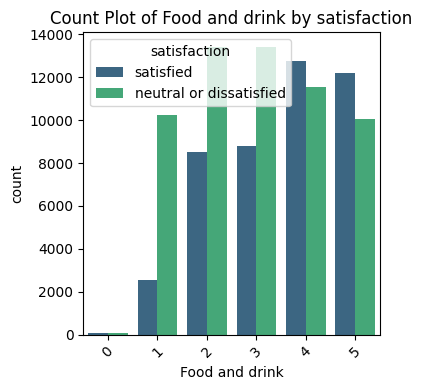

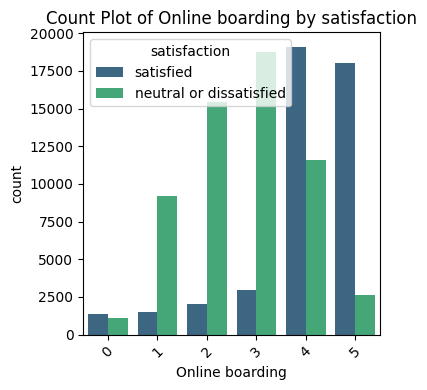

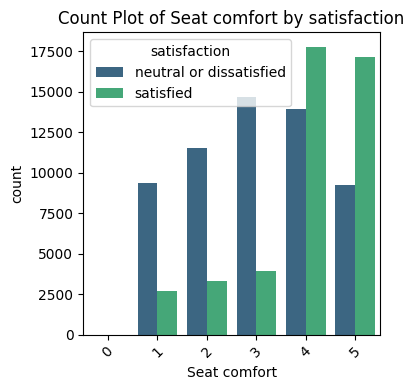

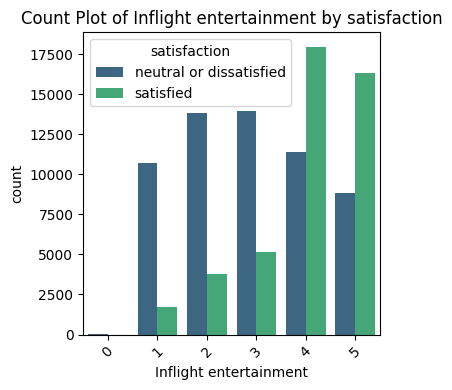

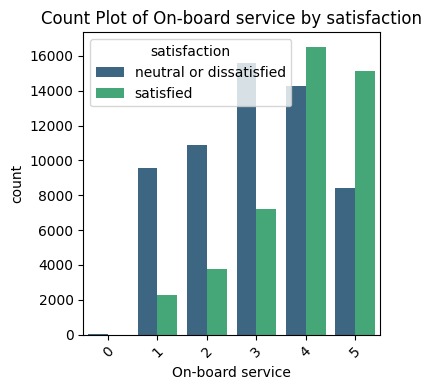

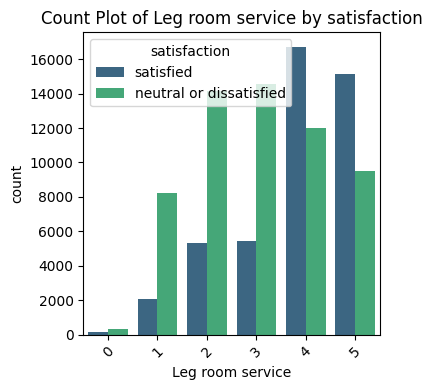

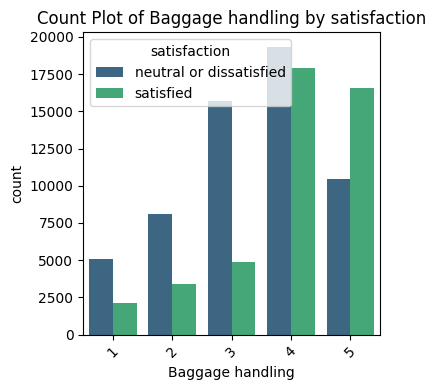

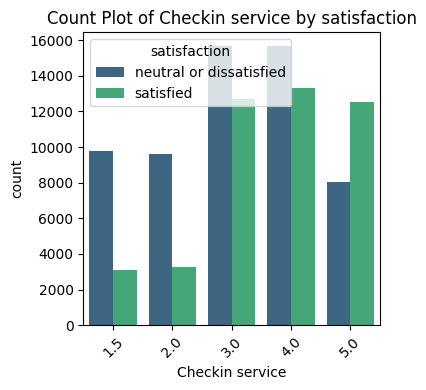

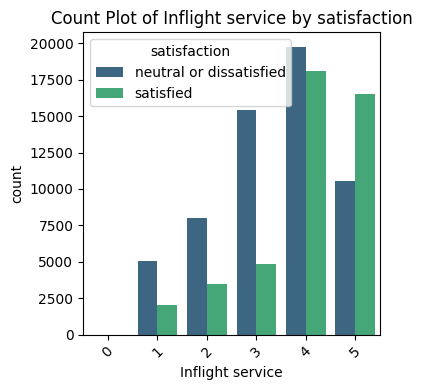

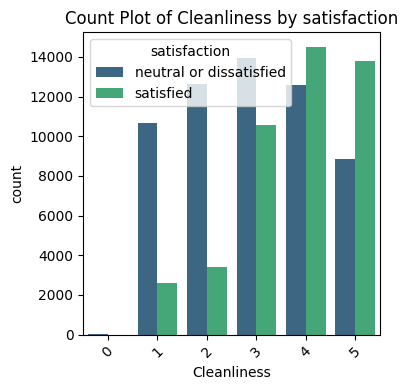

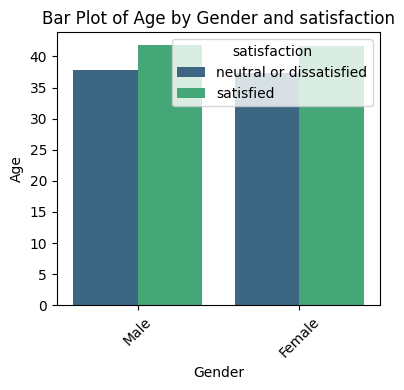

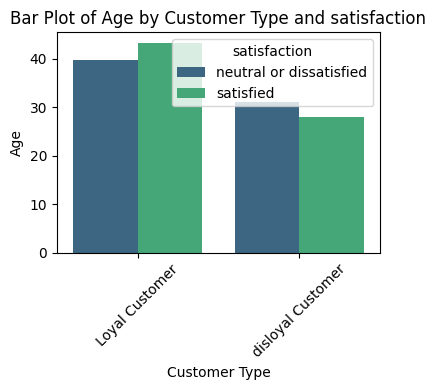

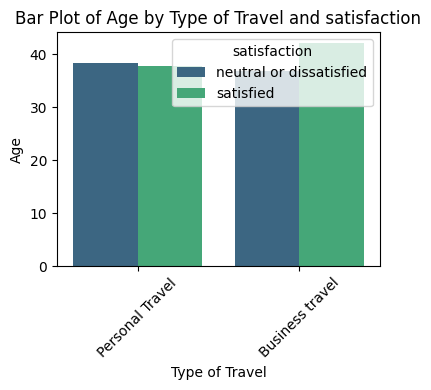

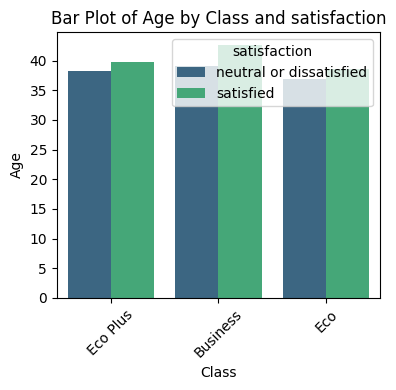

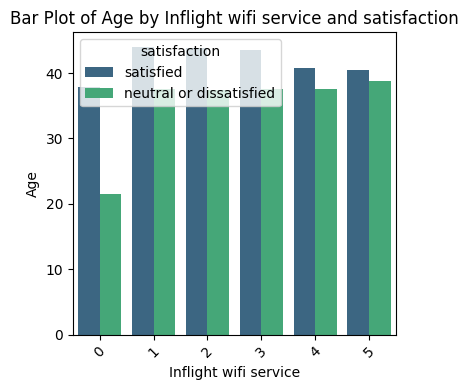

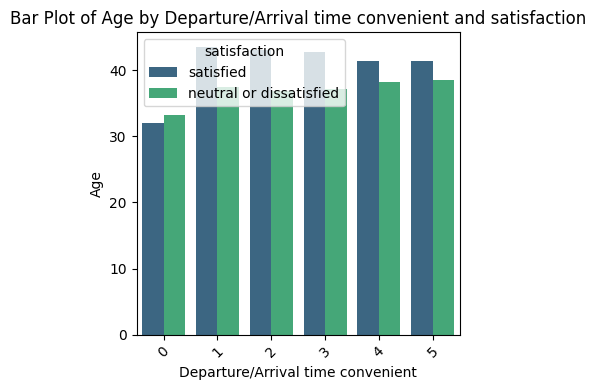

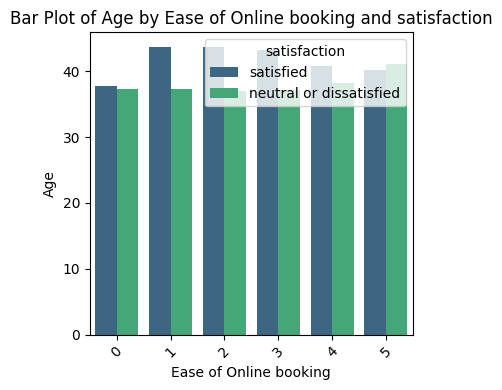

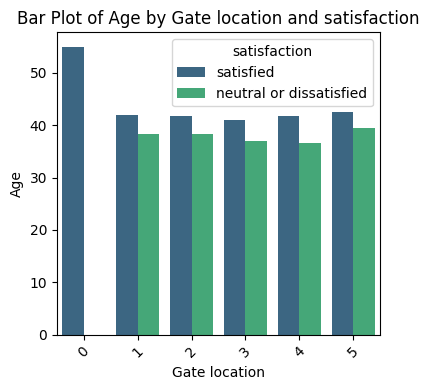

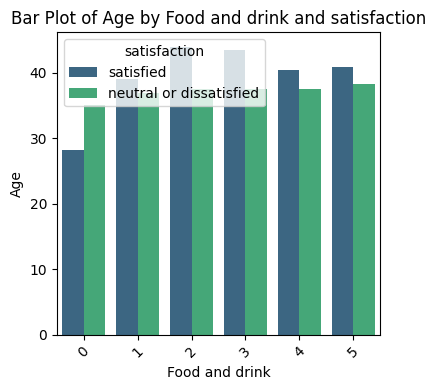

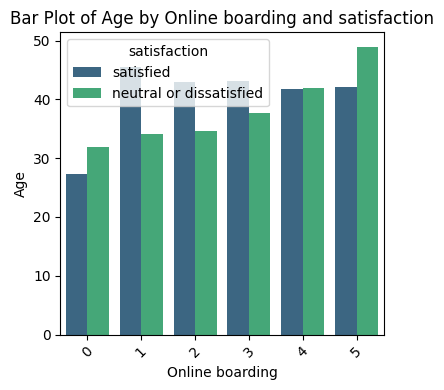

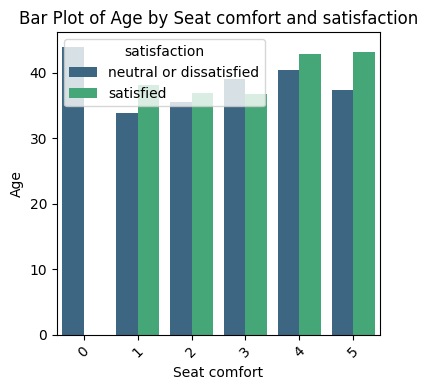

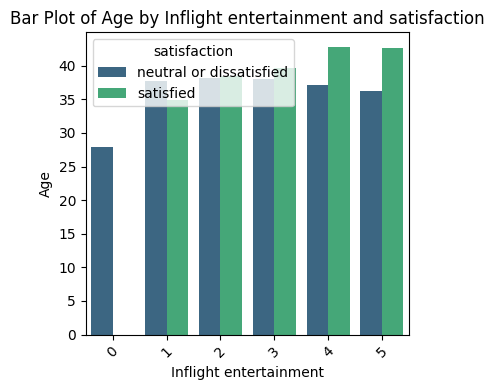

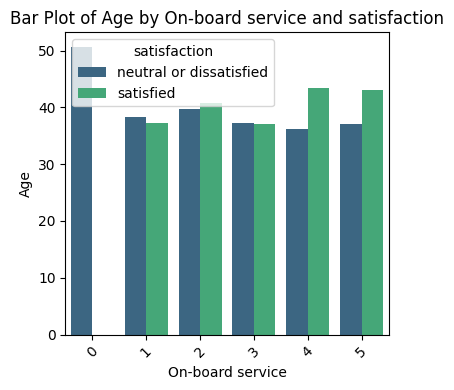

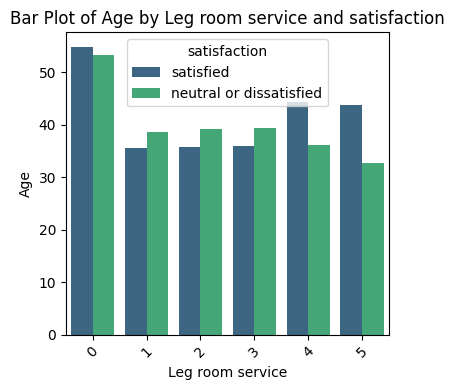

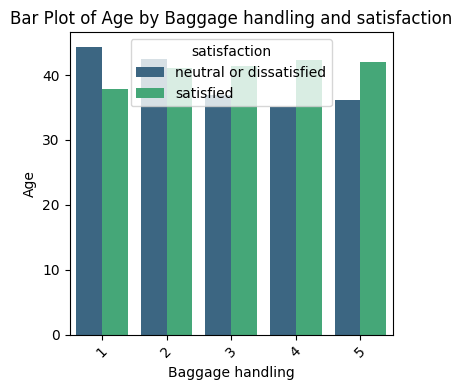

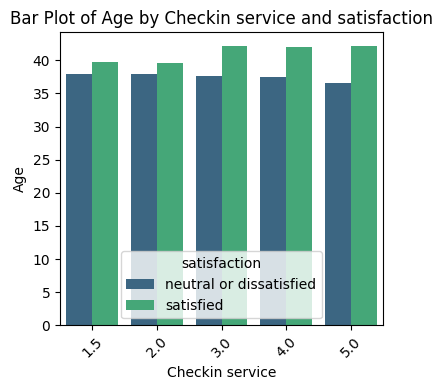

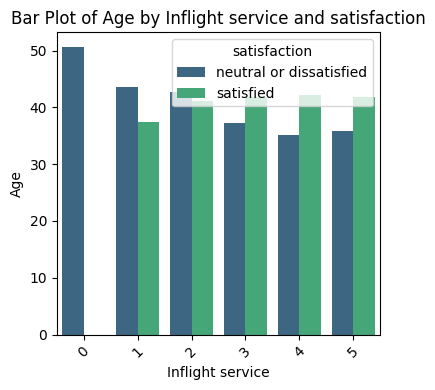

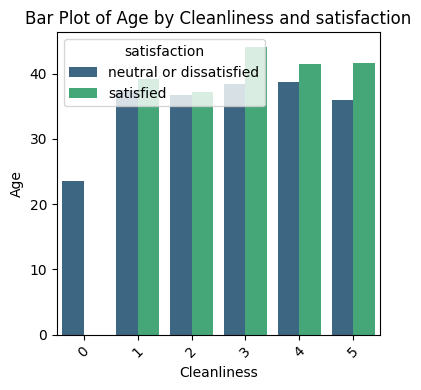

In [40]:
target_column = ['satisfaction']

# Numerical vs Categorical
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[target_column[0]], y=df[col], palette='viridis')
    plt.title(f"Boxplot of {col} by {target_column[0]}")
    plt.tight_layout()
    plt.show()

# Categorical vs Categorical
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=df[col], hue=df[target_column[0]], palette='viridis')
    plt.title(f"Count Plot of {col} by {target_column[0]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Categorical vs Numerical
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.barplot(x=df[col], y=df[numerical_columns[0]], hue=df[target_column[0]], ci=None, palette='viridis')
    plt.title(f"Bar Plot of {numerical_columns[0]} by {col} and {target_column[0]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**IMPORTANT INSIGHTS**

- Majority of people who travel are from Age-group 23-40. This age group is of youngsters like students, working professionals, tourists, business man, etc.
- Most of people only travel for upto 1000km distance. As only tourist people travel for long distances.
- Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes Generally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
- Female travels slightly more than Males.
- Most of flight customers are loyal which means they have taken this flight previously too.
- Most of people travel for business purposes.
- Most people travel in Business and Eco Class Eco Plus price is generally between these two classes and just offers some basic amenities like leg-room, etc which many people cont find valuable enough.
- Flight wifi service is average. They should make it better.
- They should focus on their online booking technology as people are facing problem due to this.
- Seat Comfort and Inflight service is also not that good.

## Feature engineering

In [41]:
df['total Delay'] =df['Departure Delay in Minutes'] + df["Arrival Delay in Minutes"]

In [44]:
df['delay ratio'] =df['total Delay']/ (df['Flight Distance'] + 1)

In [45]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,total Delay,delay ration,delay ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,0.093275
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661,0.029661
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524,0.035524
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000,0.000000


In [46]:
df['Age_group'] =pd.cut(df['Age'],bins=[0,18,30,50,100],labels=['child','youngster','adult','senior'])

In [47]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,total Delay,delay ration,delay ratio,Age_group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,0.093275,child
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661,0.029661,youngster
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000,0.000000,youngster
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524,0.035524,youngster
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000,0.000000,senior


In [53]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
le = LabelEncoder()

# Corrected column names list (fix typo in 'satisfaction')
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age_group']

# Dictionary to store mappings for each column
label_mapping = {}

# Iterate through each column to encode
for col in columns_to_encode:
    # Check for NaN values and handle them before encoding (optional step)
    if df[col].isnull().any():
        print(f"Warning: Missing values found in {col}. They will be replaced by 'Missing' during encoding.")
    
    # Fill NaN values with 'Missing' and apply LabelEncoder
    df[col] = le.fit_transform(df[col].fillna('Missing'))
    
    # Store the mapping of original categories to encoded values
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings for each column
for col, mapping in label_mapping.items():
    print(f'Mapping for {col}: {mapping}')


TypeError: Cannot setitem on a Categorical with a new category (Missing), set the categories first